In [1]:
# normalisation

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelBinarizer

def showScaling(sc):
  df = df_cat.copy()
  cols = ['prix', 'puissance', 'longueur']
  df[cols] = sc().fit_transform(df[cols])
  plt.scatter(df.puissance, df.prix)
  return df

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [3]:
df_cat = pd.read_csv("data/Catalogue.csv")

In [4]:
# numérisation de la colonne longueur pour améliorer les résultats

def apply_longueur(x):
    if (x == 'courte'):
        return 10
    if (x == 'moyenne'):
        return 12
    if (x == 'longue'):
        return 14
    if (x == 'tres longue'):
        return 16
    return x

df_cat['longueur'] = df_cat['longueur'].apply(apply_longueur)

In [5]:
# fonctions utiles

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelBinarizer

def scalingDataFrame(sc):
  df = df_cat.copy()
  cols = ['prix', 'puissance', 'longueur']
  df[cols] = sc().fit_transform(df[cols])
  return df

def dummiser(df,columns):
  for column in columns:
    print(column)
    df[pd.get_dummies(df[column]).columns] = pd.get_dummies(df[column])
    df = df.drop([column], axis=1)
  return df

In [6]:
# dataframe d'entrainement
df_train = scalingDataFrame(MinMaxScaler)
df_cat_dum = dummiser(df_train.drop(['couleur', 'Type', 'nbPortes'], axis=1),
                      ['nbPlaces'])

df_train = df_cat_dum[df_cat_dum.occasion == False]
df_train = df_train.drop_duplicates()

df_train.shape[0]

nbPlaces


32

In [7]:
# Affichage de l'inertie optimale

def plotKmeansInertia(df, min=1, max=10):
  inertia = []
  K_range = range(min, max)
  for k in K_range :
    model = KMeans(n_clusters=k, random_state=1).fit(df)
    inertia.append(model.inertia_)

  # params = {"ytick.color" : "w",
  #         "xtick.color" : "w",
  #         "axes.labelcolor" : "w",
  #         "axes.edgecolor" : "w"}
  # plt.rcParams.update(params)
  plt.plot(K_range, inertia)
  plt.xlabel('Nombre de clusters')
  plt.ylabel('Cout du modèle (Inertia)')
  # plt.savefig('new_data/inertieKmeans.png')

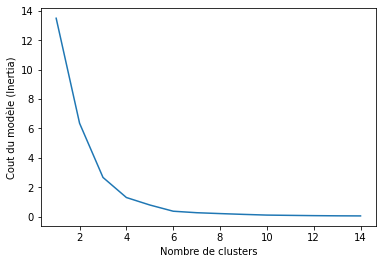

In [8]:
plotKmeansInertia(df_train.drop(['nom', 'marque'], axis=1), max=15)

In [9]:
# KMeans

def clusteringKmeans (df, n_clusters, nomType):
  model = KMeans(n_clusters=n_clusters, random_state=5)
  model.fit(df.drop(['nom', 'marque'], axis=1))
  result = model.predict(df.drop(['nom', 'marque'], axis=1))
  df[nomType] = result
  return df
df_kmeans = clusteringKmeans(df_train, 6, 'predicted')
df_kmeans.predicted.value_counts()

1    8
4    7
0    7
3    4
2    4
5    2
Name: predicted, dtype: int64

In [10]:
# insersertion de predicted dans df_cat

df_cat_type = pd.read_csv("data/Catalogue.csv")

for i in df_cat_type.index.tolist():
  nom = df_cat_type.at[i,'nom']
  df_cat_type.at[i,'predicted'] = df_kmeans[df_kmeans.nom == nom].predicted.values[0]

df_cat_type.columns

Index(['marque', 'nom', 'puissance', 'longueur', 'nbPlaces', 'nbPortes',
       'couleur', 'occasion', 'prix', 'Type', 'predicted'],
      dtype='object')

# Transfert de véhicule d'un cluster à un autre
Pour améliorer les résultats

In [11]:
df_kmeans_cor = df_kmeans.copy()
# Copper 1.6 16V
df_kmeans_cor.loc[140, 'predicted'] = 1.0
# A2 1.4
df_kmeans_cor.loc[261, 'predicted'] = 1.0

# Logan 1.6 MPI
df_kmeans_cor.loc[225, 'predicted'] = 0.0
# Almera 1.8
df_kmeans_cor.loc[130, 'predicted'] = 0.0

# X-Type 2.5 V6
df_kmeans_cor.loc[180, 'predicted'] = 3.0
# 9.3 1.8T
df_kmeans_cor.loc[65, 'predicted'] = 3.0

# insersertion de predicted dans df_cat

df_cat_type = pd.read_csv("data/Catalogue.csv")

for i in df_cat_type.index.tolist():
  nom = df_cat_type.at[i,'nom']
  df_cat_type.at[i,'predicted'] = df_kmeans_cor[df_kmeans_cor.nom == nom].predicted.values[0]

df_cat_type.columns

Index(['marque', 'nom', 'puissance', 'longueur', 'nbPlaces', 'nbPortes',
       'couleur', 'occasion', 'prix', 'Type', 'predicted'],
      dtype='object')

#Renommage des variables

In [12]:
def apply_pred(x):
    if (x == 0):
        return 'Ville/courte - 1ere gamme'
    if (x == 1):
        return 'Ville/courte - 2eme gamme'
    if (x == 2):
        return 'Monospace'
    if (x == 3):
        return 'Route 2eme gamme'
    if (x == 4):
        return 'Route 1ere gamme'
    if (x == 5):
        return 'Haut de gamme'
    return x

df_cat_type['predicted'] = df_cat_type['predicted'].apply(apply_pred)
df_cat_type['predicted'].value_counts()

Ville/courte - 2eme gamme    80
Route 2eme gamme             50
Ville/courte - 1ere gamme    50
Route 1ere gamme             40
Monospace                    30
Haut de gamme                20
Name: predicted, dtype: int64

# Export du fichier catalogue_kmeans_final

NE PAS LANCER UNE SECONDE FOIS LE CODE. Le fichier à déjà été exporté une première fois dans une version propre.

In [13]:
# df_cat_type.to_csv(path_or_buf='new_data/catalogue_kmeans_final.csv', sep=',', index=False)

# Visu du fichier final

In [14]:
df_cat_type = pd.read_csv("new_data/catalogue_kmeans_final.csv")
label = ['Ville/courte - 1ere gamme',
              'Ville/courte - 2eme gamme',
              'Route 1ere gamme',
              'Route 2eme gamme',
              'Haut de gamme',
              ]
df_test = df_cat_type[df_cat_type.occasion == False][['marque', 'nom', 'prix', 'puissance', 'predicted', 'longueur']].drop_duplicates()
for i in label:
  print('value = ', i)
  df_p= df_test[df_test.predicted == i]
  print(df_p[['marque', 'nom', 'prix', 'puissance', 'longueur', 'predicted']])

value =  Ville/courte - 1ere gamme
         marque              nom   prix  puissance longueur  \
21   Volkswagen      Polo 1.2 6V  12200         55   courte   
111     Peugeot         1007 1.4  13750         75   courte   
130      Nissan       Almera 1.8  16450        115  moyenne   
165      Lancia  Ypsilon 1.4 16V  13500         90   courte   
175         Kia      Picanto 1.1   8990         65   courte   
220    Daihatsu        Cuore 1.0   8850         58   courte   
225       Dacia    Logan 1.6 MPI   7500         90  moyenne   

                     predicted  
21   Ville/courte - 1ere gamme  
111  Ville/courte - 1ere gamme  
130  Ville/courte - 1ere gamme  
165  Ville/courte - 1ere gamme  
175  Ville/courte - 1ere gamme  
220  Ville/courte - 1ere gamme  
225  Ville/courte - 1ere gamme  
value =  Ville/courte - 2eme gamme
         marque             nom   prix  puissance longueur  \
35   Volkswagen  New Beatle 1.8  26630        110  moyenne   
45   Volkswagen    Golf 2.0 FSI  2290

Contruction du fichier Client_immatriculation avec nos variables de classes choisies avec KMeans

In [15]:
df_clients = pd.read_csv("data/Clients_immatriculation.csv")
df_cat_type = pd.read_csv("new_data/catalogue_kmeans_final.csv")
df_cat_type_unique = df_cat_type[['marque', 'nom', 'puissance', 'longueur', 'nbPlaces', 'nbPortes',
       'occasion', 'prix', 'Type', 'predicted']].drop_duplicates()
df_clients_final = pd.merge(df_clients,df_cat_type_unique, on=['marque', 'nom', 'puissance', 'longueur', 'nbPlaces', 'nbPortes', 'occasion', 'prix'])

df_clients_final.to_csv('new_data/Clients_immatriculation_predicted.csv', index=False)